The goal of this project is to investigate the characteristics of Used Cars for Sale Online. For this analysis, we are going to use the eBay dataset in the auto vehicle section. We are focused in understand the main characteristics of each year model. To improve our analysis we are also going to use the dataset Vehicle and Tire Recalls, 1967-Present. The info about the datasets is on the GitHub repository.

**Import Packages**

In [278]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


**Read dataset**

In [279]:
autos=pd.read_csv('autos.csv',encoding='ANSI')
recall=pd.read_csv('C:\\Users\\tiago\\OneDrive\\Documentos\\Portfolio\\vehicle_tire_recalls\\tire_recalls.csv')

# **Ebay Dataset**

**Explore data** 

In [280]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [281]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [282]:
autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


The first thing we noticed is that the column number of pictures(nrOfPictures) does not have any value different from  zero, so We will remove this column.

In [283]:
exclude_column=['nrOfPictures']# list of columns we want to remove

The column offer type is not relevant for our analysis, there are only  12 rows in which the values are not Angebot, which means offers in German, so We will eliminate this column.

In [284]:
autos[autos['offerType']!='Angebot'].shape

(12, 20)

In [285]:
exclude_column.append('offerType') 


The month of Registration is irrelevant because we are focused on the year, postalCode is because we are not interested in the address of sellers and abtest. After all, there is no explanation about it in the dictionary.

In [286]:
exclude_column.append('monthOfRegistration')
exclude_column.append('postalCode')
exclude_column.append('abtest')


According to the dictionary lastSeen and dateCreated could be used to estimate when the car was sold, but it does not consider that an ad could be just deleted so we are not going to use this column. 
<br>
DateCrawled, according to the dictionary was made on the same day, so all the values are the year 2016 so we will also remove this one

In [287]:
exclude_column.append('dateCrawled')
exclude_column.append('lastSeen')

autos_clean=autos.drop(exclude_column,axis=1)
autos_clean.shape

(371528, 13)

**Detecting missing values**

Let's start checking the missing values, to check It a graphical analysis suits better because there are only 13 columns so the graph will not be visually messy. The black points are the missing values.

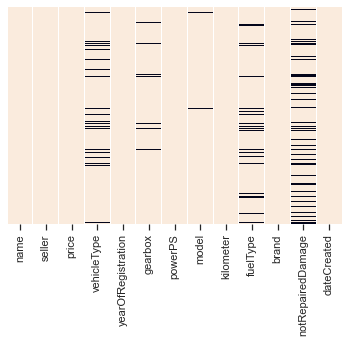

In [288]:
null=autos_clean.isnull()

sns.heatmap(~null, cbar=False, yticklabels=False)

The graph above shows that only the columns vehicle type, gearbox, model, fuel Type and no repaired Damage have missing values. Before fixing it let`s explore other aspects because fixing them would reduce our number of missing values.

**Detecting anomalies**

The column dateCreated can't be older than YearOfRegistration because it is impossible for a used car to be upload to eBay before its existence. So let's have a look at it.To compare the columns we have to format all the date values into the same date format.

In [289]:
autos_clean['dateCreated']=autos['dateCreated'].str[:4].astype(int) #keep only the first 4 digits that correspond to the year 


In [290]:
olderthancreation=autos_clean[autos_clean['dateCreated']<autos_clean['yearOfRegistration']]#mask registered before its existence 

olderthancreation.shape[0]/autos_clean.shape[0]*100 #percentage 


3.951249973084128

From the above, we can see that 3.95% had its first registration after been posted on eBay and this is illogical. Unfornately there is nothing we can do with these values, so let's delete these rows.

In [291]:
autos_clean=autos_clean[autos_clean['dateCreated']>autos_clean['yearOfRegistration']]

Now that we discarded the cars which were registered too early it is appropriate to also check cars registered too long ago. We need to make a few considerations.
<br>
The first car for mass production was inveted 1908 by  Ford Motor Company.
<br>
For this analysis, we opted to cars after the Fuel injection was implemented in cars in 1980 because it was a mark for the automobile industry. There are many reasons for considering this a mark e.g before it cars had problems starting, especially in cold days.So we are going to consider only cars registered from 1980 onward
<br>
if you are curious about Fuel injection: https://en.wikipedia.org/wiki/Fuel_injection

In [292]:
autos_clean=autos_clean[autos_clean['yearOfRegistration']>=1980]

Lets have a look at the range of prices

In [293]:
autos_clean['price'].describe()

count    3.428670e+05
mean     1.705708e+04
std      3.722661e+06
min      0.000000e+00
25%      1.200000e+03
50%      3.000000e+03
75%      7.490000e+03
max      2.147484e+09
Name: price, dtype: float64

In the Dictionary there is no mention of the currency, but it might be Euros I tried to contact the creator of the dataset, but he hasn't replied.
<br>
There are cars in which the value is 0, and that`s not likely. Doing a research background about the most expensive cars in the world the values are around 2-9 billion dollars, considering that eBay is not a place for ultra-luxury cars.
I will limit the price from 100 Euros to 5 million Euros.

In [294]:
autos_clean=autos_clean[autos_clean.price.between(100, 5*10**6, inclusive=True)] #set price range we want

**Imputing for missing values**

Now let's have a look in the column notRepairedDamage this column has many missing values according to the graph, but considering its values should be only YES or NO it is worth having a look

In [295]:
autos_clean['notRepairedDamage'].unique()

array([nan, 'ja', 'nein'], dtype=object)

we have 3 values in not Repaired we could assign "nan" and "nein" as NO and "ja" as yes, but a more effective way would be to convert it to bolean values.

In [296]:
yes_no = {"ja": True,"nein": False}

autos_clean['notRepairedDamage']= autos_clean['notRepairedDamage'].map(yes_no) # replaced each row based on yes_no
autos_clean['notRepairedDamage']=autos_clean['notRepairedDamage'].fillna(False) 

In [297]:
autos_clean['notRepairedDamage'].unique()

array([False,  True])

The column vehicle type is special a case. Different from characteristics such as the gearbox, engine power, and fuel type among versions of the same model, the vehicle type is not likely to change. So we can find these values from other rows that are the same model.

In [298]:
not_vehi_type_null=autos_clean[(autos_clean['vehicleType'].notnull()) & (autos_clean['model'].notnull())] 
#row with no missing vehicleType and model

di=dict(zip(not_vehi_type_null.model,not_vehi_type_null['vehicleType']))
#creates a dictionary of models and its vehicle Type

d=autos_clean['vehicleType'].isnull()
# A mark of the values we want to change

autos_clean.loc[d,'vehicleType']=autos_clean['model'][d] 
#setting the missing values in the column vehicle type to match the key of di dictionary

autos_clean=autos_clean.replace({'vehicleType': di})
#replacing the missing values with values from the same model in other rows.

Now that we tried to fix the values it is time to see our progress and then delete the remaining missing values.

Text(0.5, 1.0, 'After')

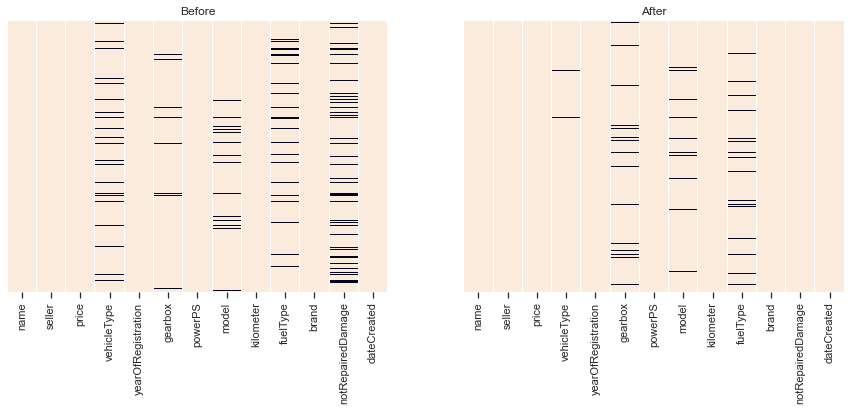

In [299]:
null_update=autos_clean.isnull()
#ploting graphs of missing values before and after our cleaning
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.heatmap(~null, cbar=False, yticklabels=False,ax=ax[0]).set_title("Before")
sns.heatmap(~null_update, cbar=False, yticklabels=False,ax=ax[1]).set_title("After")


Now we have the relevant data according to the criteria of our analysis, it is time to check whether deleting missing values.

In [300]:
100-(autos_clean.dropna(axis=0).shape[0]/autos_clean.shape[0]*100) #percentage missing data

11.18820363689018

So we would miss 11.18% of our relevant dataset, but because it is still a large dataset we will remove the missing rows.

In [301]:
autos_clean=autos_clean.dropna(axis=0)

In [302]:
autos_clean.columns

Index(['name', 'seller', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated'],
      dtype='object')

Our analysis will focus on the columns yearofRegistration and brand, so we will group our data frame by these columns. For the numeric values we are going to group by the average in each year, for the strings values the most common value, and for the boolean values the number of True. because we are doing different analysis we will divide into 3 data frames and merge it later on with the recall dataset. We are doing this way because it makes the code easier to read the code than not dividing the eBay dataset into 3 data frames.

In [303]:
strings=['seller','vehicleType','gearbox','model','fuelType']
numeric=['kilometer','powerPS','price']
autos_1=pd.pivot_table(autos_clean,index=["brand","yearOfRegistration"],values=strings,aggfunc=pd.Series.mode)
autos_2=pd.pivot_table(autos_clean,index=["brand","yearOfRegistration"],values=numeric,aggfunc=np.mean)
autos_3=pd.pivot_table(autos_clean,index=["brand","yearOfRegistration"],values='notRepairedDamage',aggfunc=pd.Series.sum)

We are not including the column Datacreate because all its values are 2016 and we already used this information.

# **Recalls data set**

**Explore**

In [304]:
recall.head()

,Record ID,NHTSA Campaign,Manufacturer Campaign,Vehicle Make,Vehicle Model,Model Year,Vehicle Manufacturer,Recall Type,Recall Component,Manufacture Start Date,Manufacture End Date,Estimated Units,Recall Initiative,Recall Manufacturer,Recall Notification Date
0,1,02V288000,02S41,FORD,FOCUS,2001,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
1,2,02V288000,02S41,FORD,FOCUS,2000,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
2,3,02V236000,NaN,JAYCO,FT EAGLE 10 SG,2003,"JAYCO, INC.",VEHICLE,EQUIPMENT:OTHER:LABELS,20020730.0,20020813.0,86.0,MFR,"JAYCO, INC.",20020923.0
3,4,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2003,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0
4,5,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2002,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0


we are interested in the number of recalls in each brand. So we are going to focus on the brand as key in this dataset is called Vehicle Make to merge with eBay data frames.

The columns we are interested are Vehicle Make, Recall Type, Recall Component and Model year.

In [305]:
not_exclude_recall=['Vehicle Make','Model Year','Recall Type','Recall Component','Vehicle Model']
recall_clean=recall[not_exclude_recall]

**Detecting missing values**

In [306]:
recall_clean.isnull().sum()

Vehicle Make        0
Model Year          0
Recall Type         0
Recall Component    0
Vehicle Model       0
dtype: int64

There are no missing values in our rows.

**Merging  issues**

We want to use Vehicle make as the key for merging our data frames,but in the eBay dataset it is called brand. So let's rename Vehicle make to brand

In [307]:
recall_clean=recall_clean.rename(columns={'Vehicle Make':'brand','Model Year':'yearOfRegistration'}, inplace=False)


There is a another difference in brand between the datasets, in the eBay dataset the brands name are in lowercase and the words are separeted by an underline, while the recall dataset is in uppercase and a space between the words. To fix this problem we are going to transform to lowercase and also add an underline between words. 

In [308]:
recall_clean.loc[:,'brand']=recall_clean.loc[:,'brand'].str.replace(' +', '_').str.lower().str.strip('_')
recall_clean.head()

,brand,yearOfRegistration,Recall Type,Recall Component,Vehicle Model
0,ford,2001,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,FOCUS
1,ford,2000,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,FOCUS
2,jayco,2003,VEHICLE,EQUIPMENT:OTHER:LABELS,FT EAGLE 10 SG
3,holiday_rambler,2003,VEHICLE,STRUCTURE,ADMIRAL SE
4,holiday_rambler,2002,VEHICLE,STRUCTURE,ADMIRAL SE


**Detecting anomalies**

In [309]:
recall_clean['yearOfRegistration'].describe()

count    123837.000000
mean       2506.142348
std        1948.678174
min        1949.000000
25%        1994.000000
50%        2003.000000
75%        2010.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

The range of vehicules model has some values that are impossible,vehichiles that are made in the future the year 9999. The minimum year is 1949 what is actually possible, but in order to match eBay dataset we also limit the year from 1980 to 2015.

In [310]:
recall_clean=recall_clean[recall_clean['yearOfRegistration'].between(1980,2015)]

We are interested in the number of recalls per each brand,so we will group the brands and  Model Year and analyse the the most commonn Recall Type and Recall Component

In [311]:
recall_merge=pd.pivot_table(recall_clean,index=["brand","yearOfRegistration"], values=['Recall Type','Recall Component','Vehicle Model'],  aggfunc=pd.Series.mode)

In [312]:
recall_merge

Recall Component  \
brand  yearOfRegistration                                                      
4-star 2006                                           LATCHES/LOCKS/LINKAGES   
       2007                                           LATCHES/LOCKS/LINKAGES   
       2008                                           LATCHES/LOCKS/LINKAGES   
       2009                                           LATCHES/LOCKS/LINKAGES   
       2010                                           LATCHES/LOCKS/LINKAGES   
...                                                                      ...   
zero   2015                [ELECTRICAL SYSTEM, EXTERIOR LIGHTING, SERVICE...   
zieman 1980                                                  TRAILER HITCHES   
zimmer 1980                [EXTERIOR LIGHTING:HEADLIGHTS, SERVICE BRAKES,...   
       1981                [EXTERIOR LIGHTING:HEADLIGHTS, SEAT BELTS:FRON...   
       1982                            [EXTERIOR LIGHTING:HEADLIGHTS, SEATS]   

                          Recall Type                 Vehicle Model  
brand  yearOfRegistration                                            
4-star 2006                   VEHICLE                 HORSE TRAILER  
       2007                   VEHICLE                 HORSE TRAILER  
       2008                   VEHICLE                 HORSE TRAILER  
       2009                   VEHICLE                 HORSE TRAILER  
       2010                   VEHICLE                 HORSE TRAILER  
...                               ...                           ...  
zero   2015                   VEHICLE               [DS, FX, S, SR]  
zieman 1980                   VEHICLE             [D2, D2W, ZIEMAN]  
zimmer 1980                   VEHICLE       [GOLDEN SPIRIT, ZIMMER]  
       1981                   VEHICLE  [GOLDEN SPIRIT, VAN, ZIMMER]  
       1982                   VEHICLE                        ZIMMER  

[9448 rows x 3 columns]

**Joining multiples datasets**

we are going to merge the Dataframes that came from the same dataset eBay, the method  is not important because these data frames have the same number of rows.

In [313]:
print(autos_1.shape)
print(autos_2.shape)
print(autos_3.shape)

(1200, 5)
(1200, 3)
(1200, 1)


In [314]:
autos_combined=autos_1.merge(autos_2, on=["brand","yearOfRegistration"]).merge(autos_3, on=["brand","yearOfRegistration"])

Now for the recall data frame, the data frame from eBay is more important to consider how to merge, so we are going to make the recall data set to adapt to the eBay one using the left method, but before merging lets change Vehicle Model to recall model to not confuse with model from ebay dataset.

In [315]:
recall_merge=recall_merge.rename(columns={'Vehicle Model':'Recall model'})

In [316]:
combined=autos_combined.merge(recall_merge, on=["brand","yearOfRegistration"],how='left')
combined.head()

fuelType  gearbox   model  seller vehicleType  \
brand      yearOfRegistration                                                 
alfa_romeo 1980                 benzin  manuell  spider  privat      cabrio   
           1981                 benzin  manuell  spider  privat      cabrio   
           1982                 benzin  manuell  spider  privat      cabrio   
           1983                 benzin  manuell  spider  privat      cabrio   
           1984                 benzin  manuell  spider  privat      cabrio   

                                   kilometer     powerPS         price  \
brand      yearOfRegistration                                            
alfa_romeo 1980                 67500.000000  105.750000  13562.250000   
           1981                121666.666667  127.666667  14900.000000   
           1982                127000.000000  137.000000  17259.600000   
           1983                141666.666667  118.666667  12033.333333   
           1984                 65000.000000  126.000000  12799.666667   

                               notRepairedDamage  \
brand      yearOfRegistration                      
alfa_romeo 1980                                0   
           1981                                0   
           1982                                1   
           1983                                0   
           1984                                0   

                                                                Recall Component  \
brand      yearOfRegistration                                                      
alfa_romeo 1980                [ELECTRICAL SYSTEM:IGNITION:SWITCH, FUEL SYSTE...   
           1981                                ELECTRICAL SYSTEM:IGNITION:SWITCH   
           1982                                ELECTRICAL SYSTEM:IGNITION:SWITCH   
           1983                                                              NaN   
           1984                                                              NaN   

                              Recall Type    Recall model  
brand      yearOfRegistration                              
alfa_romeo 1980                   VEHICLE          SPIDER  
           1981                   VEHICLE          SPIDER  
           1982                   VEHICLE  [GTV6, SPIDER]  
           1983                       NaN             NaN  
           1984                       NaN             NaN

In [317]:
combined.shape

(1200, 12)

As we can see the still have the same number of raws from the eBay dataset, also noticed that there are a few values of Recall columns that are NaN because a recall did not happen that year model

**Data exploratory analysis**

The first question we want to answer is which one is the most popular brand and model on eBay.

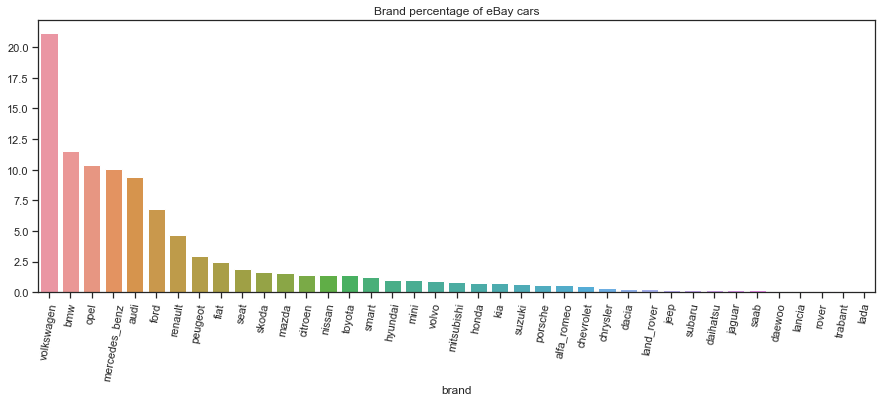

In [318]:
brand=autos_clean.groupby(['brand']).size().sort_values(ascending=False) #separate the dataset by brand
Total_cars=(brand.sum())/100

#plot most popular brands
fig, ax =plt.subplots(figsize=(15,5))
ax.set_title('Brand percentage of eBay cars')
sns.set(font_scale=1.3)
ranking=sns.barplot(x=brand.index, y=brand/Total_cars,)# percentage
ranking=ranking.set_xticklabels(labels=brand.index,rotation=80)





 The first consideration is that Volkswagen has 10% more cars than than the second most popular brand BMW. A second one is that the brands Volkswagen, BMW, Opel, Mercedes Benz,Audi and ford have more cars in eBay than the sum of all other brands. The charactheristic all that the top 5  most popular brands share is that all of them are german companies. The only german company that is not on the top of the list is porsche.

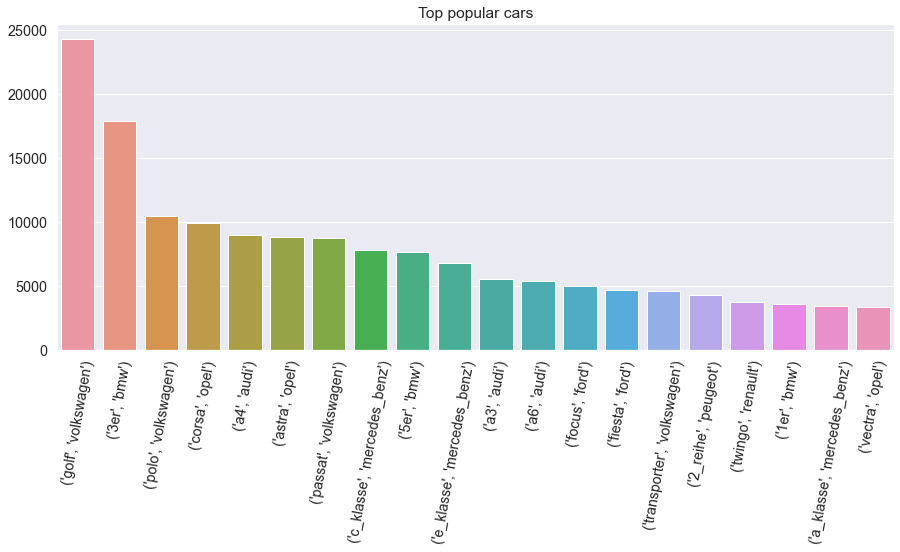

In [319]:
model=autos_clean.groupby(['model','brand']).size().sort_values(ascending=False) #separate by model and brand
model_top20=model[0:20]

#plot most popular cars
fig, ax =plt.subplots(1,1,figsize=(15,6))
sns.set(font_scale=1.3)
ax.set_title('Top popular cars')
t=sns.barplot(x=model_top20.index, y=model_top20).set_xticklabels(labels=model_top20.index,rotation=80)


Not surprisingly the top 10 most popular cars belong to the top 4 four most popular brands. Golf is the most popular car on eBay.Now that we alredy know the most popular brands and cars is time to adress which characterics they have.

From now on we are going only to explore the top 6 most popular brands Volkswagen, BMW, Opel, Mercedes Benz,Audi and ford.


In [320]:
autos_top=autos_clean[(autos_clean['brand']=='volkswagen')|(autos_clean['brand']=='bmw')|(autos_clean['brand']=='opel')|(autos_clean['brand']=='audi')|(autos_clean['brand']=='mercedes_benz')|(autos_clean['brand']=='ford')]


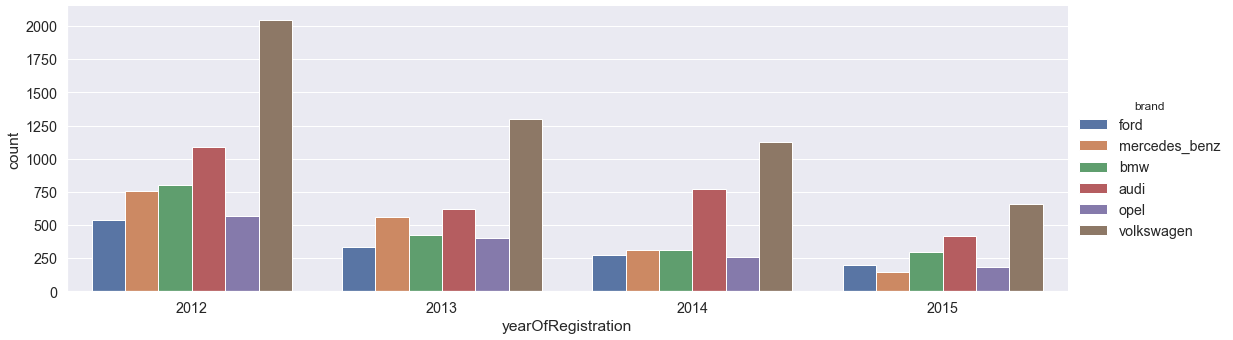

In [321]:
autos_clean_top_=autos_top[autos_top['yearOfRegistration']>2011]

sns.catplot(data=autos_clean_top_,kind='count',x='yearOfRegistration',hue='brand',height=5, # make the plot 5 units high
    aspect=3)

The graph above shows that Volkswage is responsible for the majority per year model in the last 4 years, while the 5 other positions have flutuated among the positions.

In [322]:
combined=combined.reset_index()
combined=combined[combined['yearOfRegistration']>2011]
combined=combined[(combined['brand']=='volkswagen')|(combined['brand']=='bmw')|(combined['brand']=='opel')|(combined['brand']=='audi')|(combined['brand']=='mercedes_benz')|(combined['brand']=='ford')]

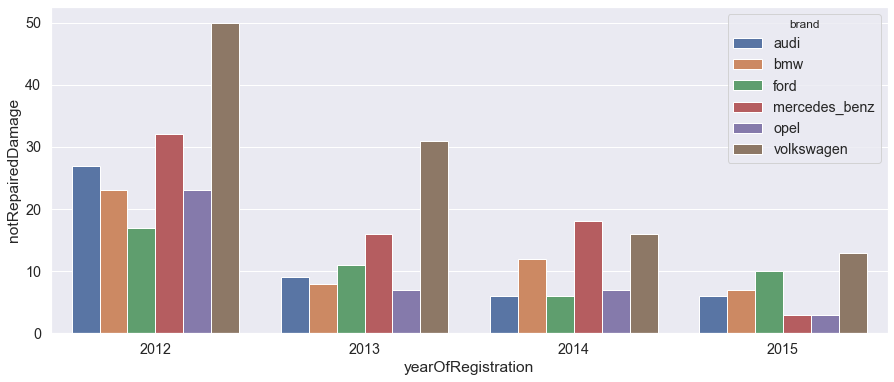

In [323]:
#plot number of damaged cars
fig, ax =plt.subplots(1,1,figsize=(15,6))
sns.barplot(x='yearOfRegistration', y='notRepairedDamage', hue='brand', data=combined)

Looking at the graph of the past year we see that Volkswagen is also the brand that has damaged cars, except for 2014, what would be expected since it is the company with more cars on eBay. The surprise is that Mercedez Benz usually ranks second place and for the year model 2014 it has even more than Volkswagen.

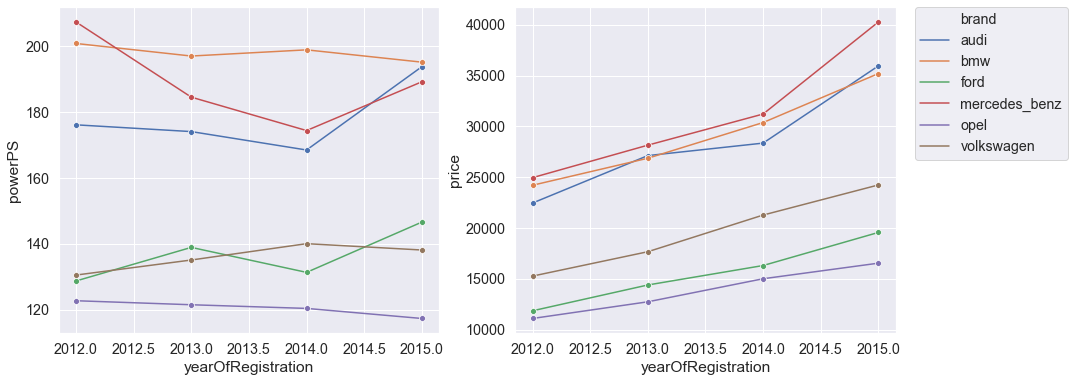

In [324]:
fig, ax =plt.subplots(1,2,figsize=(15,6))
ax1 = sns.lineplot(x="yearOfRegistration", y="powerPS",hue='brand',legend=False, data=combined,marker='o',ax=ax[0])
ax2 = sns.lineplot(x="yearOfRegistration", y="price",hue='brand', data=combined,marker='o',ax=ax[1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

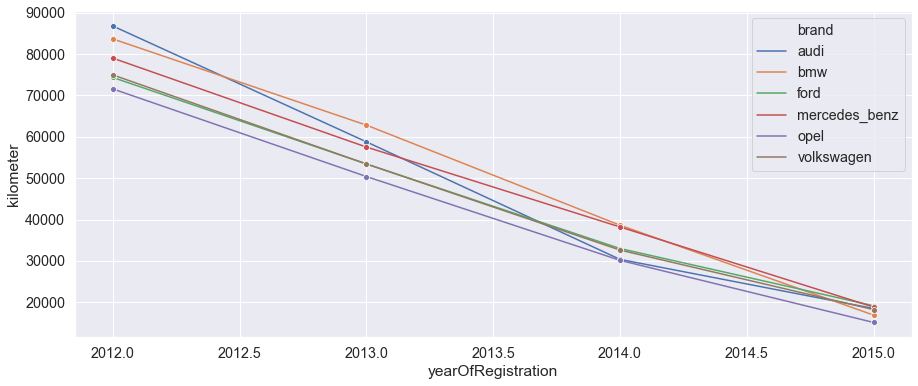

In [325]:
fig, ax =plt.subplots(1,1,figsize=(15,6))
ax3 = sns.lineplot(x="yearOfRegistration", y="kilometer",hue='brand',legend='brief', data=combined,marker='o')

From the graphics, we see that among the top 6 most popular brands they are divided into two groups the ones for high-end consumers, BMW, Audi, and Mercedes bens because they have higher engine power and also higher price. The graph about the Kilometer shows that the 6 companies in this aspect are in similar levels.

For the final step, we are going to check if the most popular models of each company are the ones wich most recalls.

In [336]:
exclude_combined=['seller','kilometer','powerPS','price','notRepairedDamage','yearOfRegistration']
def combined_year(year):# return a table per year showing the most frequent values for each brand
    combined__=combined[combined['yearOfRegistration']==year]
    combined__=combined__.drop(exclude_combined,axis=1)
    return combined__

In [337]:
combined_year(2015)

,brand,fuelType,gearbox,model,vehicleType,Recall Component,Recall Type,Recall model
71,audi,diesel,automatik,a3,limousine,ENGINE AND ENGINE COOLING:COOLING SYSTEM,VEHICLE,A3
107,bmw,diesel,automatik,x_reihe,limousine,EXTERIOR LIGHTING,VEHICLE,"[X3, X4, X5]"
336,ford,benzin,manuell,fiesta,kleinwagen,POWER TRAIN:AUTOMATIC TRANSMISSION:CONTROL MOD...,VEHICLE,TRANSIT
642,mercedes_benz,diesel,automatik,andere,limousine,ENGINE AND ENGINE COOLING:ENGINE:DIESEL,VEHICLE,"[SPRINTER 2500, SPRINTER 3500]"
779,opel,benzin,manuell,andere,kleinwagen,NaN,NaN,NaN
1164,volkswagen,benzin,manuell,golf,limousine,"[ENGINE AND ENGINE COOLING:ENGINE, FUEL SYSTEM...",VEHICLE,GOLF


In [338]:
combined_year(2014)

,brand,fuelType,gearbox,model,vehicleType,Recall Component,Recall Type,Recall model
70,audi,diesel,manuell,a3,limousine,ENGINE AND ENGINE COOLING:COOLING SYSTEM,VEHICLE,Q5
106,bmw,diesel,automatik,1er,limousine,"FUEL SYSTEM, GASOLINE:DELIVERY:FUEL PUMP",VEHICLE,"[320I, 328I]"
335,ford,benzin,manuell,fiesta,kleinwagen,EQUIPMENT ADAPTIVE,VEHICLE,ESCAPE
641,mercedes_benz,diesel,automatik,c_klasse,limousine,"[AIR BAGS, STRUCTURE:BODY:HOOD]",VEHICLE,CLA250
778,opel,benzin,manuell,andere,kleinwagen,NaN,NaN,NaN
1163,volkswagen,diesel,manuell,golf,limousine,AIR BAGS:FRONTAL,VEHICLE,PASSAT


In [339]:
combined_year(2013)

,brand,fuelType,gearbox,model,vehicleType,Recall Component,Recall Type,Recall model
69,audi,diesel,manuell,a3,limousine,"[ENGINE AND ENGINE COOLING:COOLING SYSTEM, FUE...",VEHICLE,"[A6, A7, Q5]"
105,bmw,diesel,automatik,3er,limousine,"[SERVICE BRAKES, HYDRAULIC:POWER ASSIST:VACUUM...",VEHICLE,X3
334,ford,benzin,manuell,focus,kleinwagen,EQUIPMENT,VEHICLE,ESCAPE
640,mercedes_benz,diesel,automatik,c_klasse,limousine,STRUCTURE:BODY:HOOD,VEHICLE,"[CLS550, CLS63, SL550, SL63, SLK250, SLK350]"
777,opel,benzin,manuell,andere,kleinwagen,NaN,NaN,NaN
1162,volkswagen,diesel,manuell,golf,limousine,AIR BAGS:FRONTAL,VEHICLE,PASSAT


In [340]:
combined_year(2012)

,brand,fuelType,gearbox,model,vehicleType,Recall Component,Recall Type,Recall model
68,audi,diesel,automatik,a4,kombi,"FUEL SYSTEM, GASOLINE:FUEL INJECTION SYSTEM:FU...",VEHICLE,"[A6, Q5]"
104,bmw,diesel,automatik,3er,limousine,"[AIR BAGS:FRONTAL:DRIVER SIDE INFLATOR MODULE,...",VEHICLE,"[135I, 320I, 328I, 528I, X5 SAV, Z4]"
333,ford,diesel,manuell,focus,kleinwagen,EQUIPMENT,VEHICLE,F-550 SD
639,mercedes_benz,diesel,automatik,c_klasse,limousine,AIR BAGS:PASSENGER SIDE FRONTAL,VEHICLE,"[E350, GLK350]"
776,opel,benzin,manuell,astra,kleinwagen,NaN,NaN,NaN
1161,volkswagen,diesel,manuell,golf,limousine,AIR BAGS:FRONTAL,VEHICLE,"[JETTA, PASSAT]"


From the above, we see that only for the year model 2015 Volkswagen and Audi have the most popular cars model on eBay that also most had recalled.